# Project Template and Guidance

This Notebook is intended to provide some guidance for getting started with creating your first complete project workflow.

## Step 0 | Setup and Imports

Start by saving this Notebook to your Google Drive account. Then go to your Google Drive, click on the Colab Notebooks folder to find
You'll have to log into Google Drive this way if you want to load your dataset or save save your work as a new dataset.

In [ ]:
# Mount your Google Drive. It will prompt you to log into your Google account.
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Change the working directory to your project folder.
import os
drive_path = '/content/drive/MyDrive/Colab Notebooks/'
project_folder = 'Econ_0150_Project/'
os.chdir(drive_path + project_folder)

In [ ]:
# Check which files are in your Project folder
# os.listdir()

In [ ]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf

In [ ]:
# Once you've mounted Google Drive, you can open a dataset from your project folder
data = pd.read_csv('econ0150_project.csv')
# And you can save your dataset after you've worked on it.
# data.to_csv('cleaned_data.csv')

# Spending Affect on Scores (Ragan Liebsch; Emily Nguyen)

# Research Question: Do schools with higher spending see higher test scores?

# Data Source: 2022 NAEP Math Scores -- https://www.nationsreportcard.gov/highlights/mathematics/2022/#region-state-district-performance-grade-4, https://www.nationsreportcard.gov/highlights/mathematics/2022/#region-state-district-performance-grade-8,
# Revenues and Expenditures for Public Elementary and Secondary Education: School Year 2021–22 (Fiscal Year 2022) -- in folder!

# Methods:

# Main Finding:


In [ ]:
data.head()

,State,FY20,FY21,FY20_21_pct_change,revenues_per_pupil,FY21_22_pct_change,eighth_grade_scores,fourth_grade_scores,expenditures_per_pupil
0,Alabama,12822,14057,9.6,14423,2.6,264,230,11862
1,Alaska,21716,21748,0.1,21346,-1.8,270,226,20186
2,Arizona,11806,12630,7.0,13140,4.0,271,232,10401
3,Arkansas,12961,14056,8.4,13587,-3.3,267,228,12167
4,California,17813,19964,12.1,20596,3.2,270,230,16739


## Step 1 (Part 1) | Univariate EDA

Summarize the main variables of interest.

In [ ]:
eighthgrade = data['eighth_grade_scores']
fourthgrade = data['fourth_grade_scores']
expenditure = data['expenditures_per_pupil']
revenue = data['revenues_per_pupil']

## Step 2 (Part 2) | Bivariate EDA

Visualize the main relationships of interest.

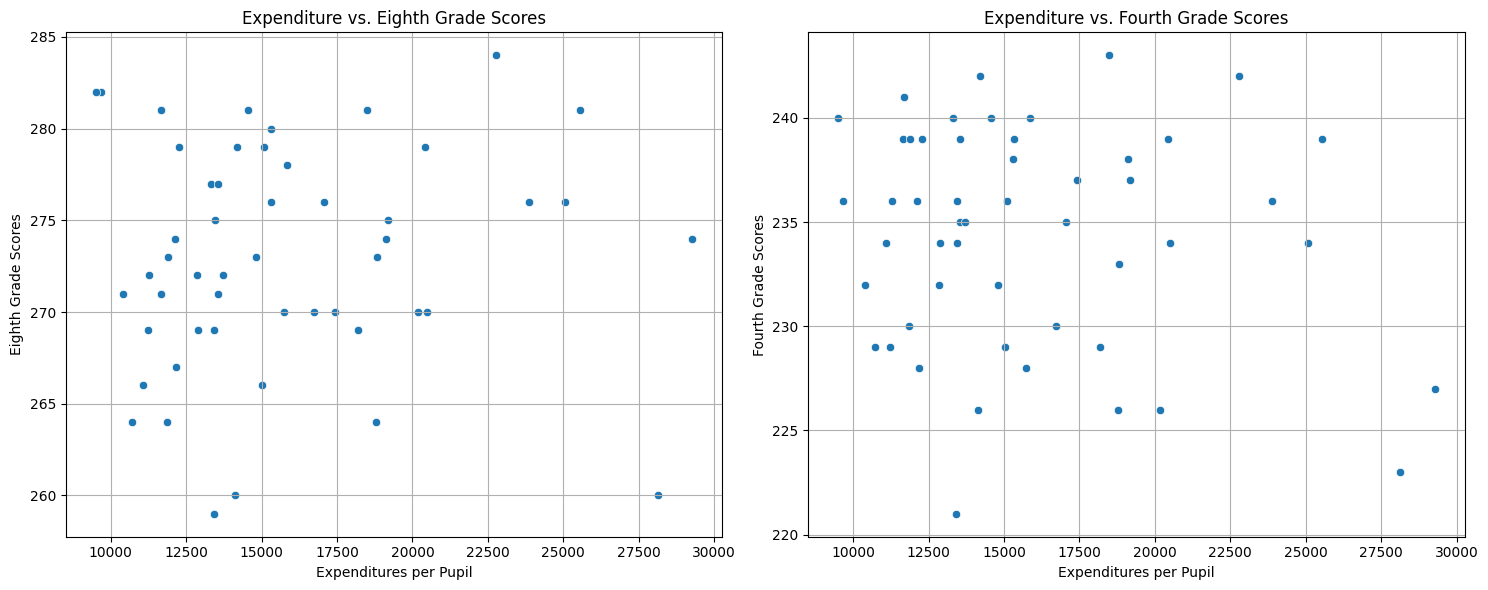

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(15, 6)) # Create a figure with 2 subplots (1 row, 2 columns)

# Plot for eighth_grade_scores
sns.scatterplot(x=expenditure, y=eighthgrade, ax=axes[0])
axes[0].set_title('Expenditure vs. Eighth Grade Scores')
axes[0].set_xlabel('Expenditures per Pupil')
axes[0].set_ylabel('Eighth Grade Scores')
axes[0].grid(True)

# Plot for fourth_grade_scores
sns.scatterplot(x=expenditure, y=fourthgrade, ax=axes[1])
axes[1].set_title('Expenditure vs. Fourth Grade Scores')
axes[1].set_xlabel('Expenditures per Pupil')
axes[1].set_ylabel('Fourth Grade Scores')
axes[1].grid(True)

plt.tight_layout() # Adjust layout to prevent overlap
plt.show()

## Step 3 (Part 3 - 5)

Develop your statistical model.

1. Write down you null hypothesis
2. Write down your statistical model
3. Run your statistical model
4. Visualize your statistical model (if appropriate)

In [ ]:
# null hypothesis: B1 = 0 -- No relationship between NAEP scores and school spending
# statistical model: score = B0 + B1 * expenditures

In [ ]:
# LINEAR REGRESSION FOR EIGHTH GRADE

model3 = smf.ols('eighthgrade ~ expenditure', data).fit()
print(model3.summary().tables[1])

                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept     271.5310      3.048     89.075      0.000     265.405     277.657
expenditure  8.908e-05      0.000      0.482      0.632      -0.000       0.000


In [ ]:
# LINEAR REGRESSION FOR FOURTH GRADE

model4 = smf.ols('fourthgrade ~ expenditure', data).fit()
print(model4.summary().tables[1])

                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept     236.7918      2.614     90.585      0.000     231.539     242.045
expenditure    -0.0002      0.000     -0.973      0.335      -0.000       0.000


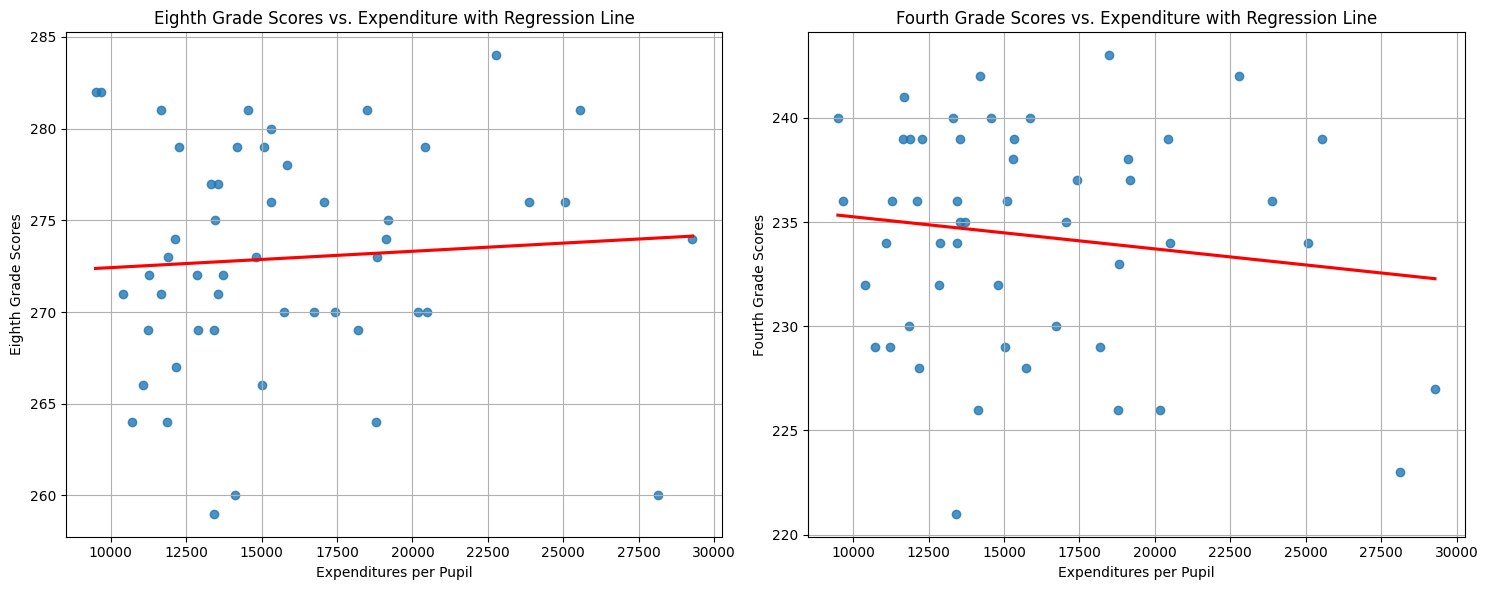

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(15, 6)) # Create a figure with 2 subplots (1 row, 2 columns)

# Regression plot for eighth_grade_scores
sns.regplot(data=data, y=eighthgrade, x=expenditure, ci=None, line_kws={'color': 'red'}, ax=axes[0])
axes[0].set_title('Eighth Grade Scores vs. Expenditure with Regression Line')
axes[0].set_xlabel('Expenditures per Pupil')
axes[0].set_ylabel('Eighth Grade Scores')
axes[0].grid(True)

# Regression plot for fourth_grade_scores
sns.regplot(data=data, y=fourthgrade, x=expenditure, ci=None, line_kws={'color': 'red'}, ax=axes[1])
axes[1].set_title('Fourth Grade Scores vs. Expenditure with Regression Line')
axes[1].set_xlabel('Expenditures per Pupil')
axes[1].set_ylabel('Fourth Grade Scores')
axes[1].grid(True)

plt.tight_layout() # Adjust layout to prevent overlap
plt.show()